In [1]:
import cv2
import matplotlib.pyplot as plt

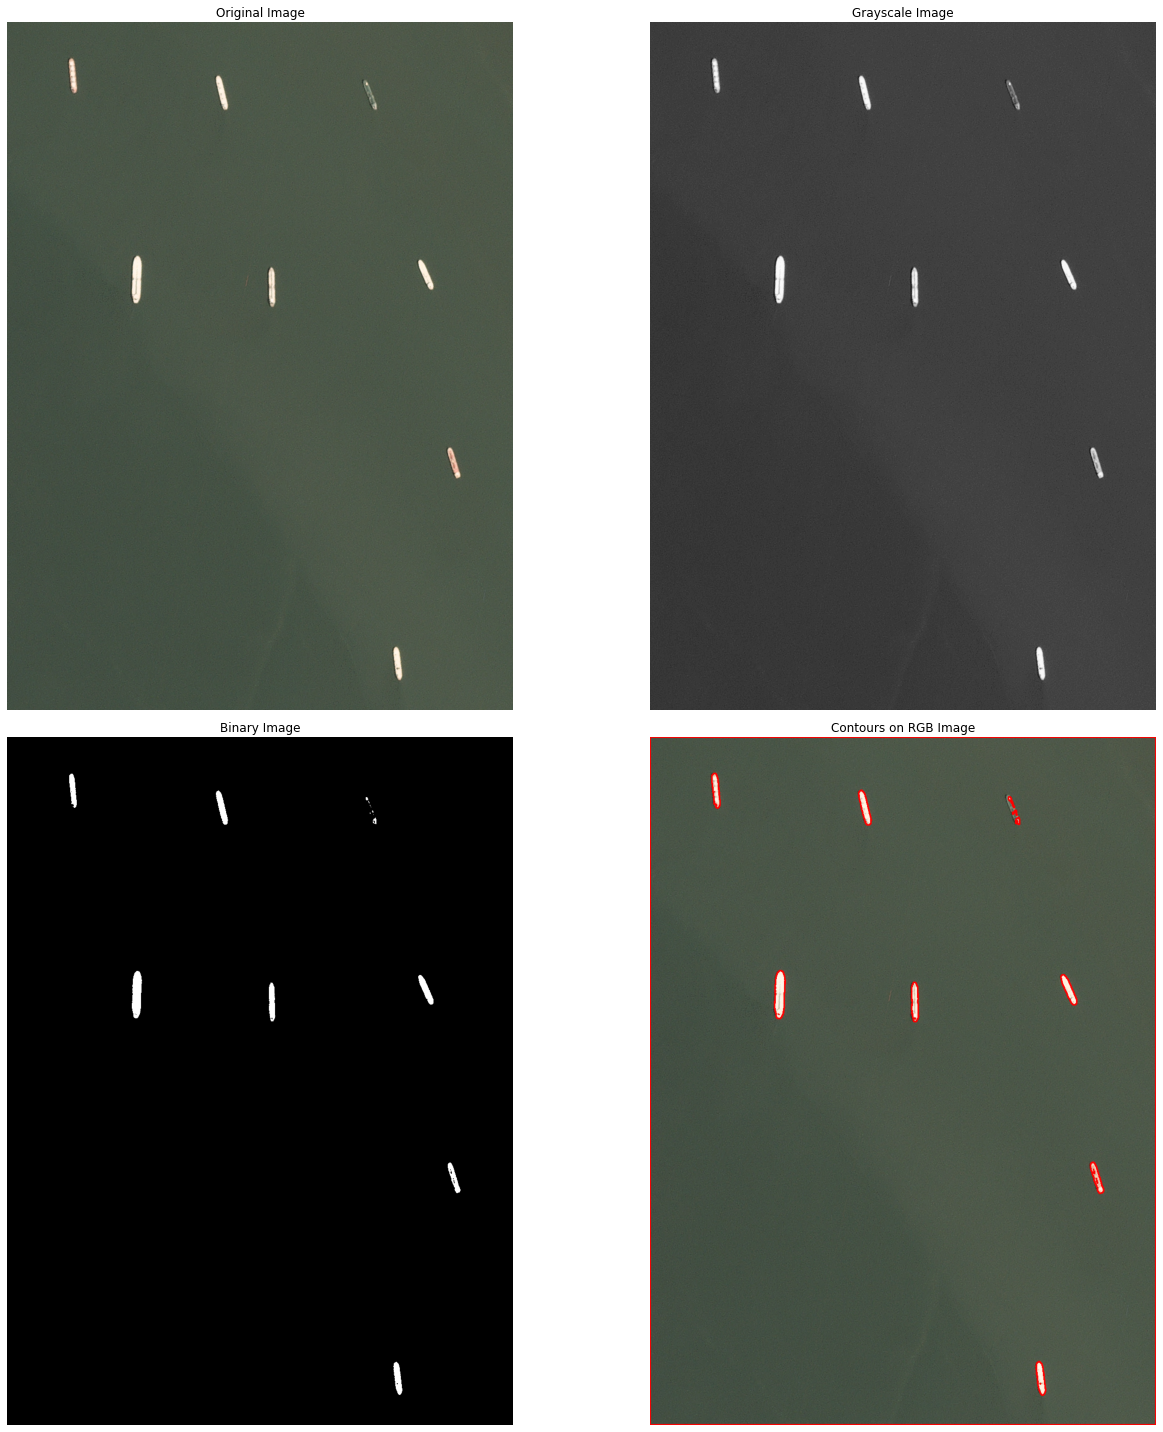

In [2]:
# Read the source image
image = cv2.imread('./scenes/Ship.png')

# Convert BGR image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to create a binary image
_, binary_im = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)

# Invert the binary image
inverted_binary_im = ~binary_im

# Find contours
contours, hierarchy = cv2.findContours(inverted_binary_im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the RGB image
with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 0, 255), 2)
    
# Display the images using matplotlib
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(gray_image, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(binary_im, cmap='gray')
axs[1, 0].set_title('Binary Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Contours on RGB Image')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [3]:
# Print the total number of detected contours
print('Total number of detected contours is:', len(contours))

Total number of detected contours is: 27


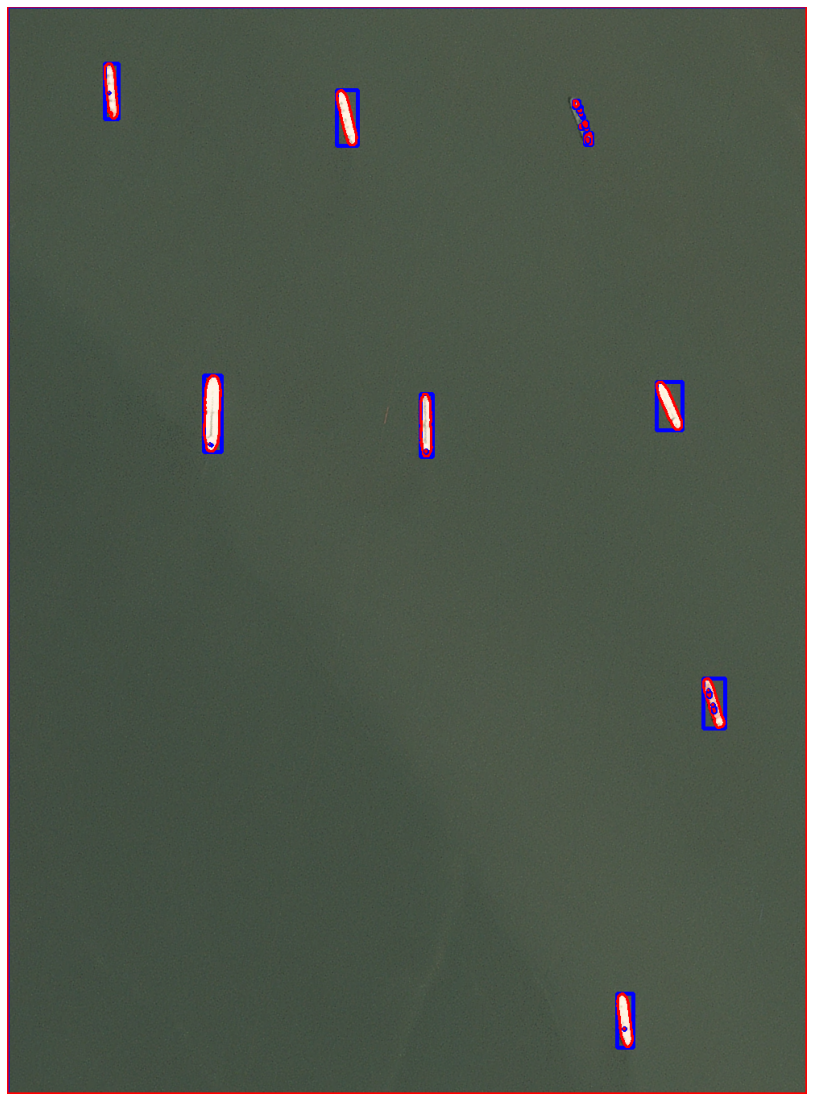

In [4]:
# Draw bounding boxes and contours on the same image
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 4)
    cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)

# Display the image with bounding boxes and contours
plt.figure(figsize=(25, 20))  # Adjust the values as desired
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [5]:
# Calculate the area of each contour
contour_areas = [cv2.contourArea(contour) for contour in contours]
# Find the contour with the maximum area
max_area_cnt = contours[max(range(len(contour_areas)), key=contour_areas.__getitem__)]
# Find the contour with the minimum area
min_area_cnt = contours[min(range(len(contour_areas)), key=contour_areas.__getitem__)]
# Print the area of the contour with maximum area
print('Maximum contour area:', cv2.contourArea(max_area_cnt))
# Print the area of the contour with minimum area
print('Minimum contour area:', cv2.contourArea(min_area_cnt))

Maximum contour area: 1338208.0
Minimum contour area: 0.0


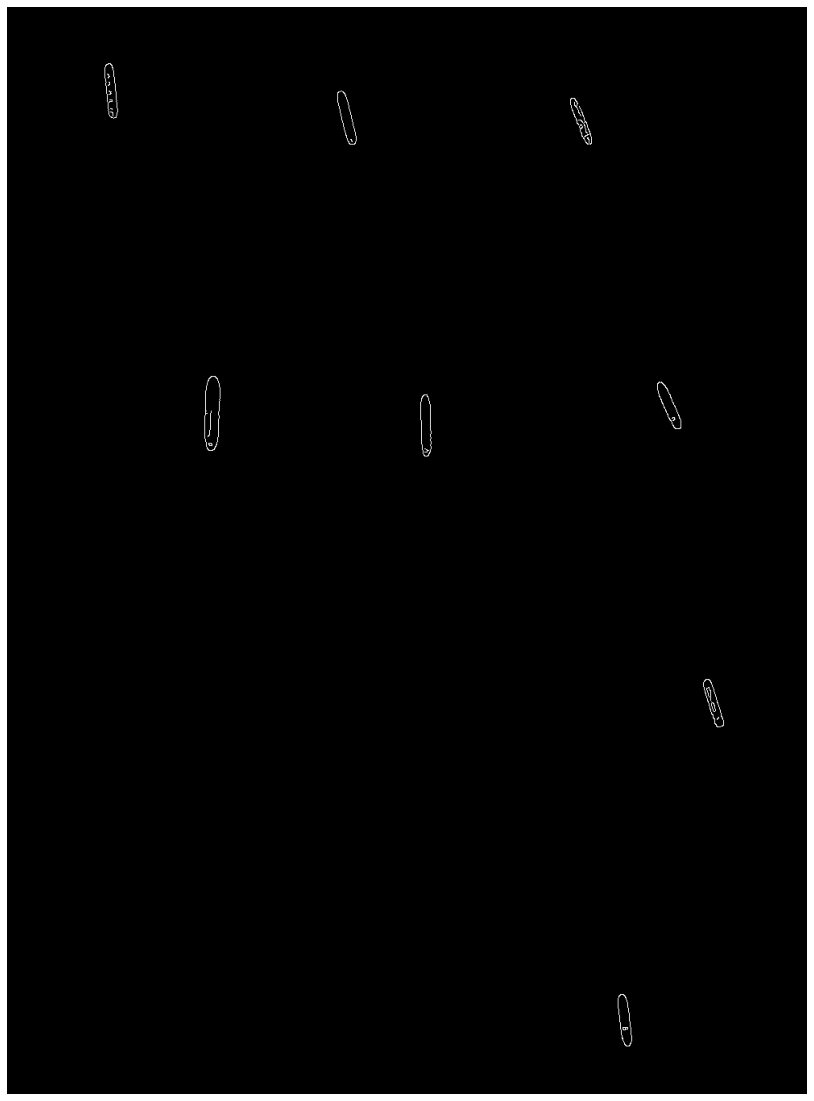

In [6]:
# Read the source image
image = cv2.imread('./scenes/Ship.png')

# Convert BGR image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur to reduce noise (optional)
blur_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
# Apply Canny edge detection
edges = cv2.Canny(blur_image, 100, 200)
plt.subplots(1, 1, figsize=(25, 20))
# Display the image with contours
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
import pandas as pd

# Calculate image moments
img_moments = cv2.moments(gray_image)

# Calculate Hu moments
hu_moments = cv2.HuMoments(img_moments)
hu_moments = hu_moments.flatten()

# Create a DataFrame to store the Hu moments
hu_df = pd.DataFrame(hu_moments, columns=["Hu Moments"])

# Display the DataFrame
print(hu_df)

     Hu Moments
0  2.150880e-03
1  4.212170e-07
2  1.859233e-12
3  3.685901e-12
4 -4.874762e-24
5  1.195315e-15
6 -8.327060e-24


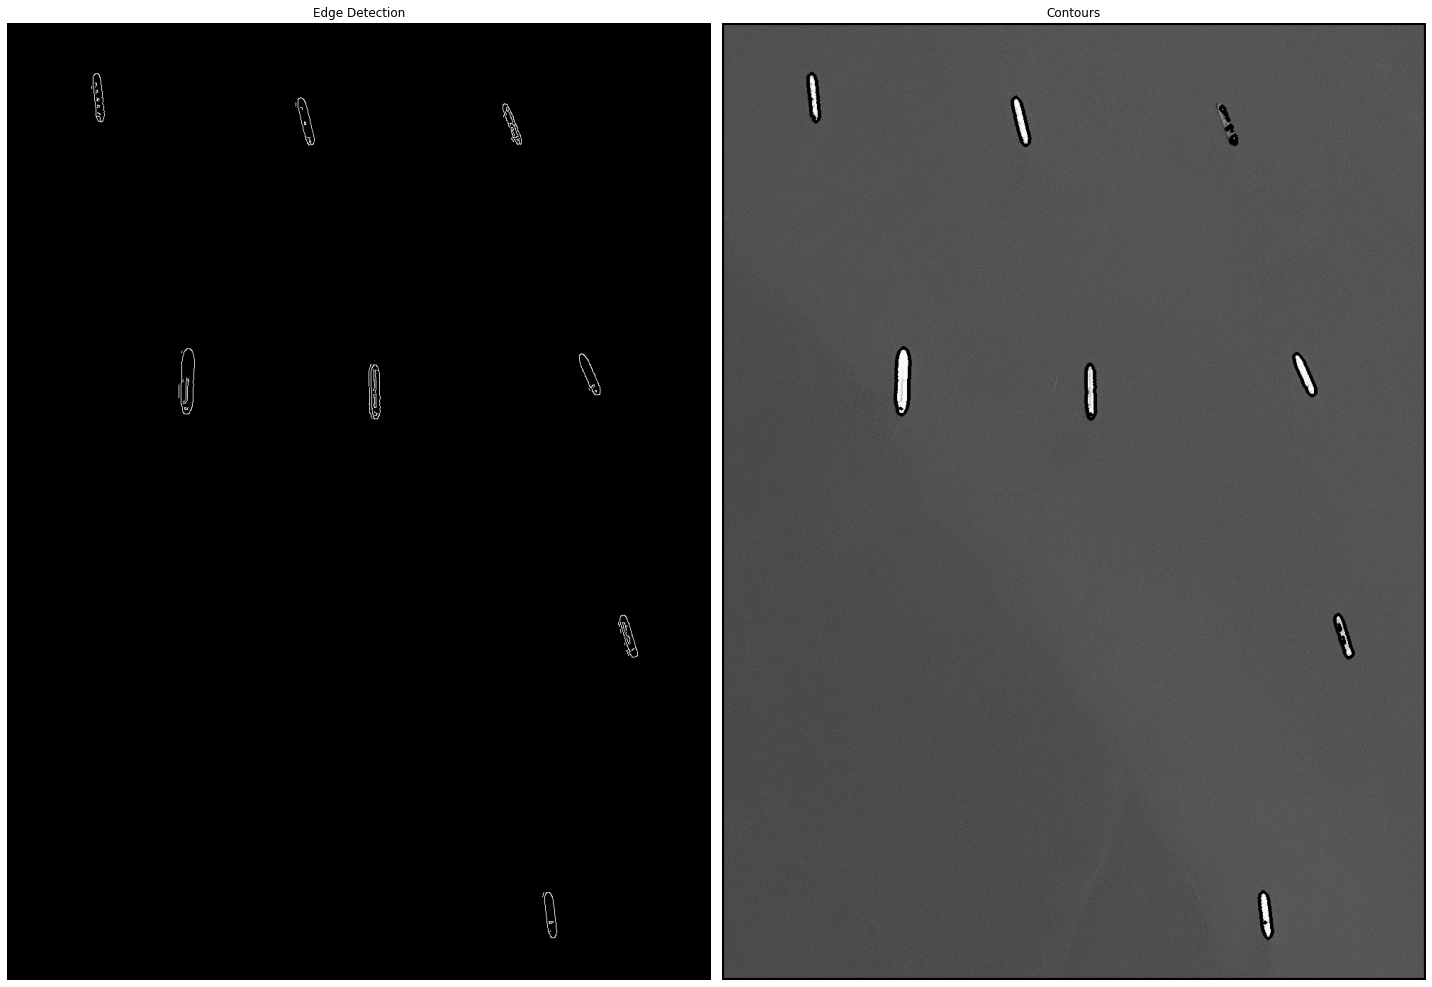

In [10]:
# Read the source image
image = cv2.imread('./scenes/Ship.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to create a binary image
_, binary_im = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)

# Invert the binary image
inverted_binary_im = ~binary_im

# Find contours
contours, hierarchy = cv2.findContours(inverted_binary_im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the grayscale image
with_contours = cv2.drawContours(gray_image.copy(), contours, -1, (0, 0, 255), 4)

# Create subplots to display the edges and contours
fig, axs = plt.subplots(1, 2, figsize=(20, 15))

# Display the edge detection result
edges = cv2.Canny(gray_image, 100, 200)
axs[0].imshow(edges, cmap='gray')
axs[0].set_title('Edge Detection')
axs[0].axis('off')

# Display the grayscale image with contours
axs[1].imshow(with_contours, cmap='gray')
axs[1].set_title('Contours')
axs[1].axis('off')

# Display the figure
plt.tight_layout()
plt.show()

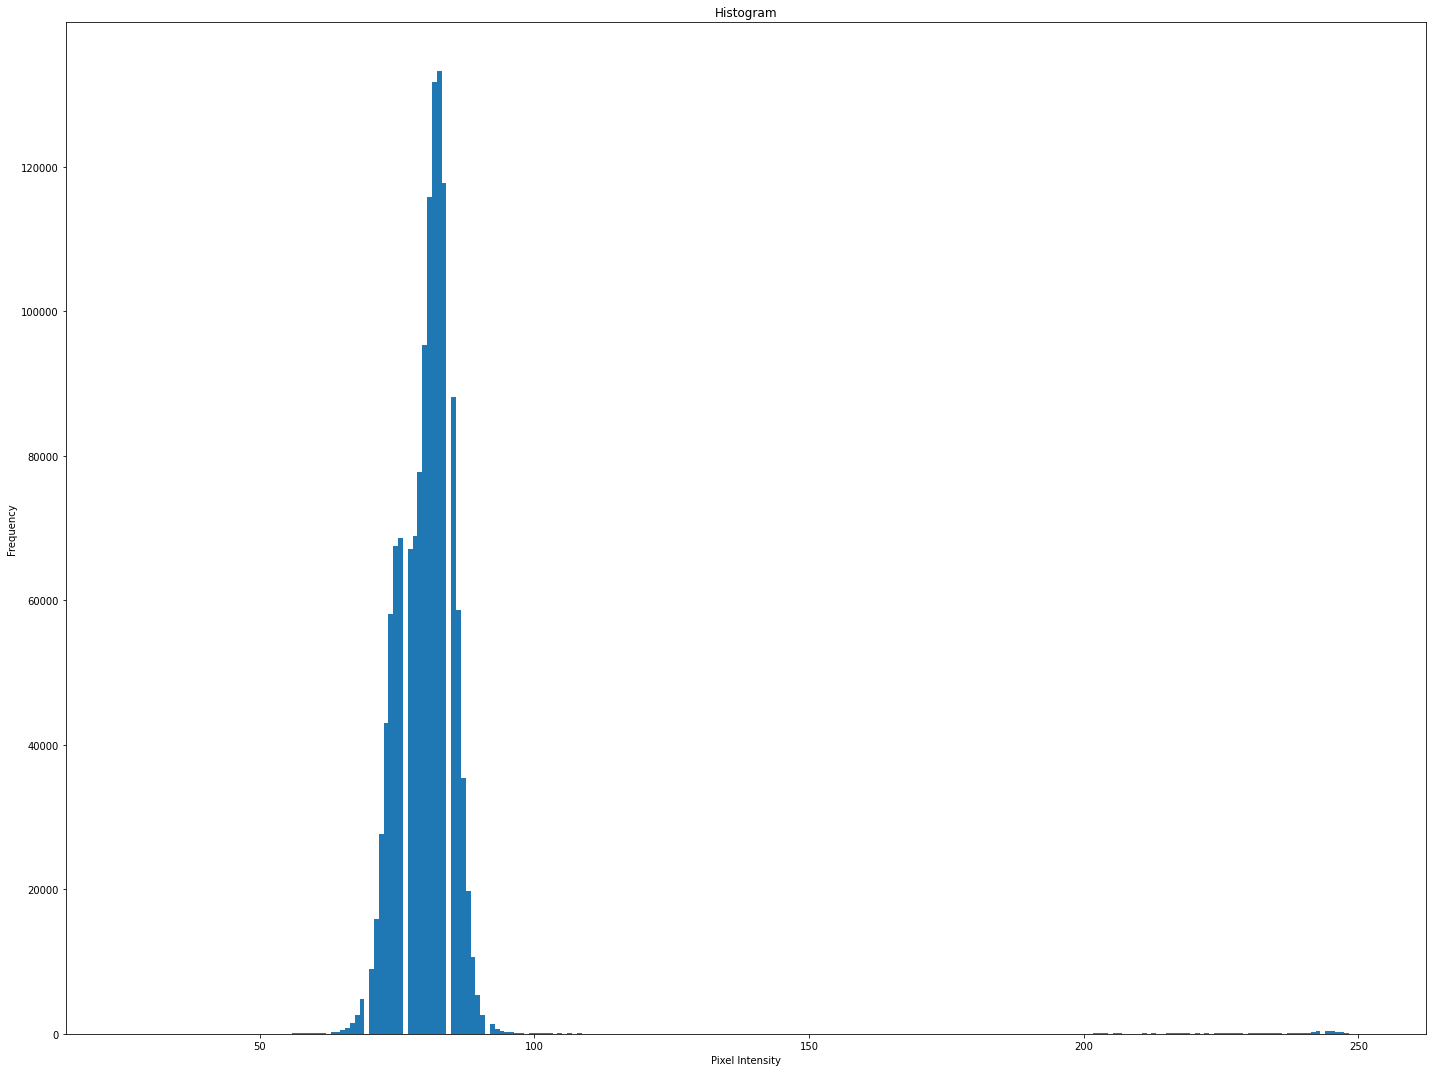

In [13]:
import matplotlib.pyplot as plt
import cv2

# Read the source image
image = cv2.imread('./scenes/Ship.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create subplots to display the edges, contours, and histogram
plt.figure(figsize=(20, 15))

# Plot histogram
plt.hist(gray_image.ravel(), bins=256)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()


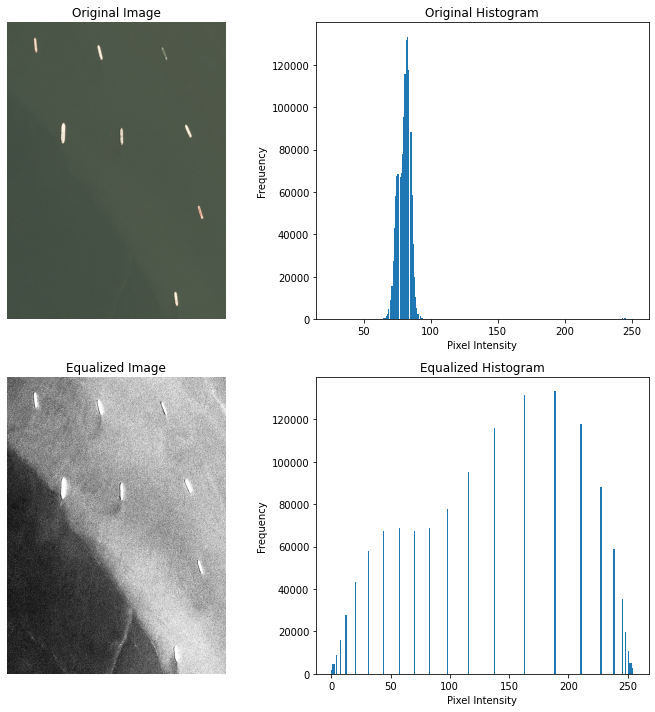

In [15]:
import matplotlib.pyplot as plt
import cv2

# Read the source image
image = cv2.imread('./scenes/Ship.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Create subplots to display the original image, equalized image, and histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display the original grayscale image
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Display the histogram of the original image
axs[0, 1].hist(gray_image.ravel(), bins=256)
axs[0, 1].set_title('Original Histogram')
axs[0, 1].set_xlabel('Pixel Intensity')
axs[0, 1].set_ylabel('Frequency')

# Display the equalized image
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')

# Display the histogram of the equalized image
axs[1, 1].hist(equalized_image.ravel(), bins=256)
axs[1, 1].set_title('Equalized Histogram')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()
